In [ ]:
!pip install optuna

  Using cached optuna-4.1.0-py3-none-any.whl.metadata (16 kB)
  Using cached alembic-1.14.0-py3-none-any.whl.metadata (7.4 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached Mako-1.3.6-py3-none-any.whl.metadata (2.9 kB)
Using cached optuna-4.1.0-py3-none-any.whl (364 kB)
Using cached alembic-1.14.0-py3-none-any.whl (233 kB)
Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)
Using cached Mako-1.3.6-py3-none-any.whl (78 kB)


In [ ]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import random
import optuna

#The Below Grid defined is same as that of the part 1


In [ ]:
class TreasureGridEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        super(TreasureGridEnv, self).__init__()

        self.grid_size = 6
        self.state_space = [(i, j) for i in range(self.grid_size) for j in range(self.grid_size)]
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(self.grid_size), spaces.Discrete(self.grid_size)
        ))

        self.treasure = (5, 5)
        self.traps = [(2, 2), (3, 3), (4, 4)]
        self.bonus = [(1, 1), (4, 1)]
        self.reset()

    def reset(self):
        self.agent_pos = (0, 0)
        self.done = False
        return self.agent_pos

    def step(self, action):
        if self.done:
            raise Exception("Episode is done")

        x, y = self.agent_pos
        if action == 0:
            y = min(self.grid_size - 1, y + 1)
        elif action == 1:
            y = max(0, y - 1)
        elif action == 2:
            x = max(0, x - 1)
        elif action == 3:
            x = min(self.grid_size - 1, x + 1)

        self.agent_pos = (x, y)

        reward = -1
        if self.agent_pos == self.treasure:
            reward = 100
            self.done = True
        elif self.agent_pos in self.traps:
            reward = -100
            self.done = True
        elif self.agent_pos in self.bonus:
            reward = 10

        return self.agent_pos, reward, self.done, {}

    def render(self, mode='human'):
        grid = np.full((self.grid_size, self.grid_size), ' - ')
        x, y = self.agent_pos
        grid[y, x] = ' A '

        tx, ty = self.treasure
        grid[ty, tx] = ' T '

        for trap in self.traps:
            tx, ty = trap
            grid[ty, tx] = ' X '

        for bonus in self.bonus:
            bx, by = bonus
            grid[by, bx] = ' B '

        print('\n'.join([''.join(row) for row in grid]))
        print('\n')

    def close(self):
        pass

# environment initialization

In [ ]:
env = TreasureGridEnv()
env.render()

 A  -  -  -  -  - 
 -  B  -  -  B  - 
 -  -  X  -  -  - 
 -  -  -  X  -  - 
 -  -  -  -  X  - 
 -  -  -  -  -  T 




# sarsa training function

In [ ]:
import numpy as np

def train_sarsa(env, gamma, epsilon_decay, num_episodes=500, alpha=0.1, epsilon_start=1.0, epsilon_min=0.01):
    state_size = env.grid_size * env.grid_size
    action_size = env.action_space.n
    Q = np.zeros((state_size, action_size))

    epsilon = epsilon_start
    max_steps = 100

    all_rewards = []
    epsilon_values = []

    def state_to_index(state):
        return state[0] * env.grid_size + state[1]

    for episode in range(num_episodes):
        state = env.reset()
        state_index = state_to_index(state)
        total_reward = 0

        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state_index, :])

        for step in range(max_steps):
            next_state, reward, done, _ = env.step(action)
            next_state_index = state_to_index(next_state)
            total_reward += reward

            if np.random.rand() < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(Q[next_state_index, :])

            # Update Q-value
            Q[state_index, action] += alpha * (
                reward + gamma * Q[next_state_index, next_action] - Q[state_index, action]
            )

            state_index = next_state_index
            action = next_action

            if done:
                break

        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_values.append(epsilon)
        all_rewards.append(total_reward)

    return Q, all_rewards, epsilon_values


# initial parameters


In [ ]:
gamma = 0.99
epsilon_decay = 0.995
num_episodes = 500
alpha = 0.1

# Train the agent using SARSA

In [ ]:
Q_initial = np.zeros((env.grid_size * env.grid_size, env.action_space.n))
Q_trained, all_rewards, epsilon_values = train_sarsa(env, gamma, epsilon_decay, num_episodes, alpha)

# initial Q-table

In [ ]:
print("Initial Q-table:")
print(Q_initial)

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


# trained Q-table

In [ ]:
print("\nTrained Q-table:")
print(Q_trained)


Trained Q-table:
[[ 1.30146722e+02  1.49145146e+02  1.50861913e+02  2.54519036e+02]
 [ 7.73212084e+01  1.25296156e+02  1.10455513e+02  2.56510441e+02]
 [-9.07287271e-01  1.70888120e+02  7.16841446e+00  2.16764794e+01]
 [-2.63602610e+00  7.14321100e+01  4.61810797e+00 -2.50141565e+00]
 [-2.08635926e+00 -7.00953224e-01 -2.17691542e+00 -2.09836131e+00]
 [-1.75588418e+00 -2.14009784e+00 -1.80192911e+00 -1.52270995e+00]
 [ 2.73108322e+02  2.50114614e+02  2.31110349e+02  2.36964049e+02]
 [ 2.36096633e+02  2.67523690e+02  2.18382756e+02  2.36295284e+02]
 [ 1.01915560e+01  2.51374779e+02  7.04902225e+01 -9.99840732e+01]
 [-2.59860940e+00 -5.18077350e+00  2.64934546e+01 -7.03879890e+00]
 [-1.67930338e+00 -3.65723647e+00 -1.97840089e+00 -2.05095567e+00]
 [-1.44535130e+00 -1.46588871e+00 -1.73561350e+00  6.50563510e-01]
 [ 8.00215753e+01  9.27277844e+01  2.50741111e+02  2.61695603e+01]
 [-9.99870993e+01  9.25289687e+01  2.60554862e+02  5.87338762e+01]
 [ 0.00000000e+00  0.00000000e+00  0.0000000

# total reward per episode graph

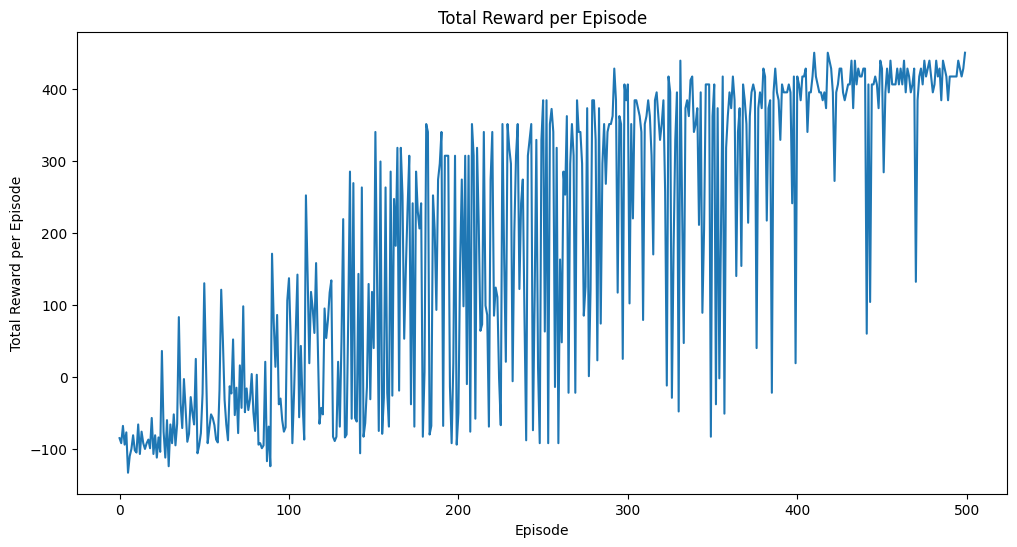

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(all_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode')
plt.title('Total Reward per Episode')
plt.show()

# epsilon decay graph

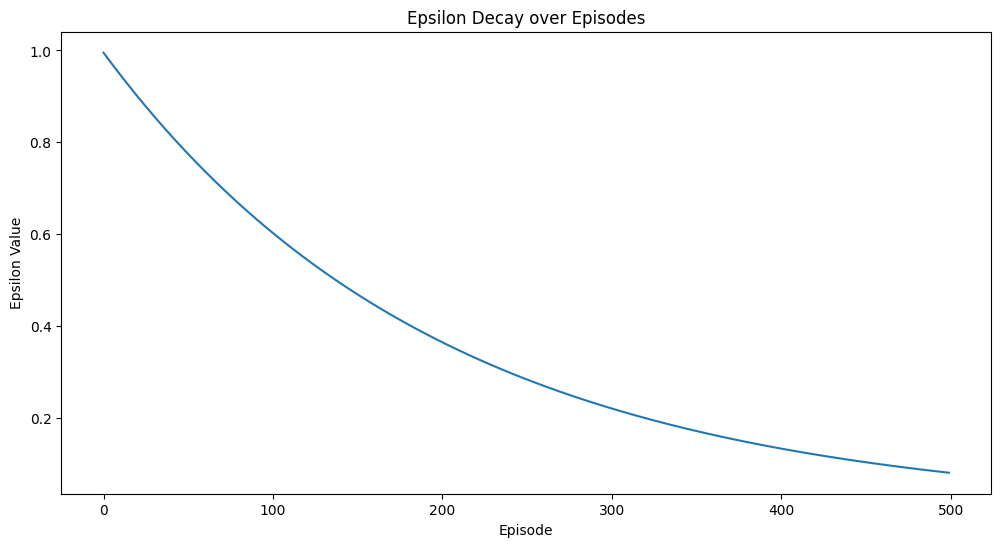

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(epsilon_values)
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay over Episodes')
plt.show()

# Greedy policy evaluation

In [ ]:
greedy_rewards = []
num_eval_episodes = 10
max_steps = 100

def state_to_index(state):
    return state[0] * env.grid_size + state[1]

for episode in range(num_eval_episodes):
    state = env.reset()
    state_index = state_to_index(state)
    total_reward = 0

    for step in range(max_steps):
        action = np.argmax(Q_trained[state_index, :])
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        state_index = state_to_index(next_state)

        if done:
            break

    greedy_rewards.append(total_reward)
    print(f"Evaluation Episode: {episode+1}, Total Reward: {total_reward}")


Evaluation Episode: 1, Total Reward: 450
Evaluation Episode: 2, Total Reward: 450
Evaluation Episode: 3, Total Reward: 450
Evaluation Episode: 4, Total Reward: 450
Evaluation Episode: 5, Total Reward: 450
Evaluation Episode: 6, Total Reward: 450
Evaluation Episode: 7, Total Reward: 450
Evaluation Episode: 8, Total Reward: 450
Evaluation Episode: 9, Total Reward: 450
Evaluation Episode: 10, Total Reward: 450


# Plot total reward per evaluation episode

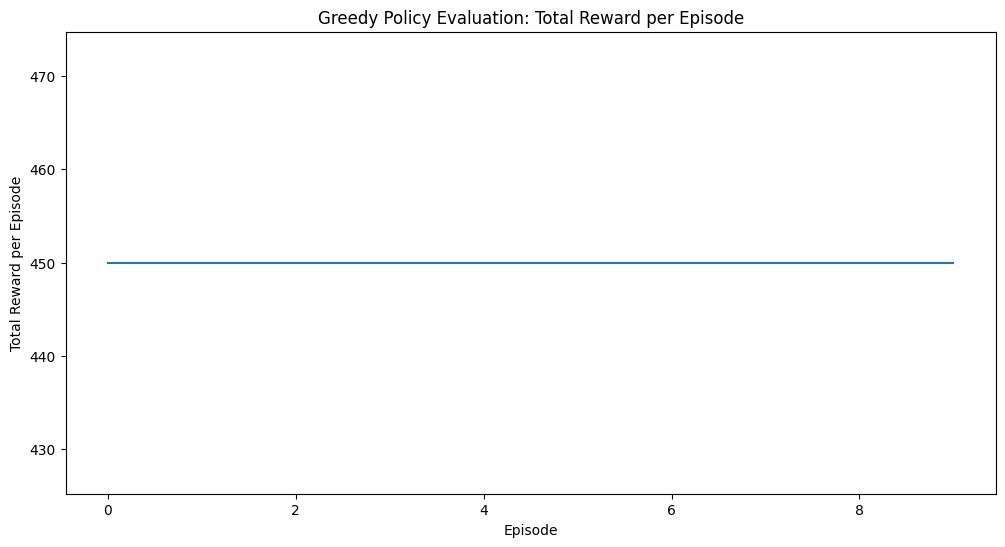

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode')
plt.title('Greedy Policy Evaluation: Total Reward per Episode')
plt.show()

#first set of hyperparameters


In [ ]:
num_episodes = 500
best_Q, best_rewards, best_epsilons = train_sarsa(
    env,
    gamma=0.001,
    epsilon_decay=0.2,
    num_episodes=num_episodes,
    alpha=0.002,
    epsilon_start=0.3,
    epsilon_min=0.002
)

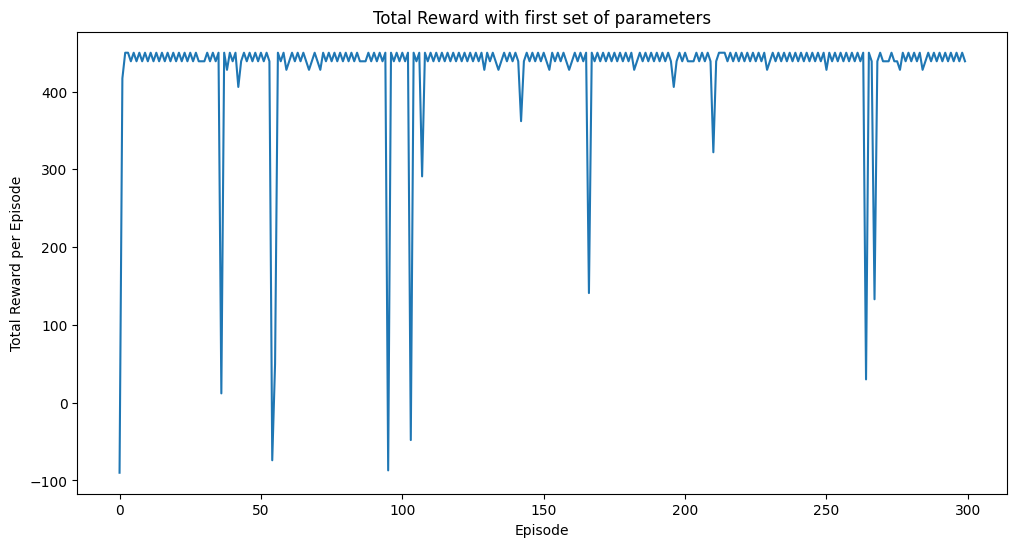

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(best_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode')
plt.title('Total Reward with first set of parameters')
plt.show()

#second set of parameters


In [ ]:
num_episodes = 300
best_Q, best_rewards, best_epsilons = train_sarsa(
    env,
    gamma=0.001,
    epsilon_decay=0.02,
    num_episodes=num_episodes,
    alpha=0.9,
    epsilon_start=0.03,
    epsilon_min=0.02
)

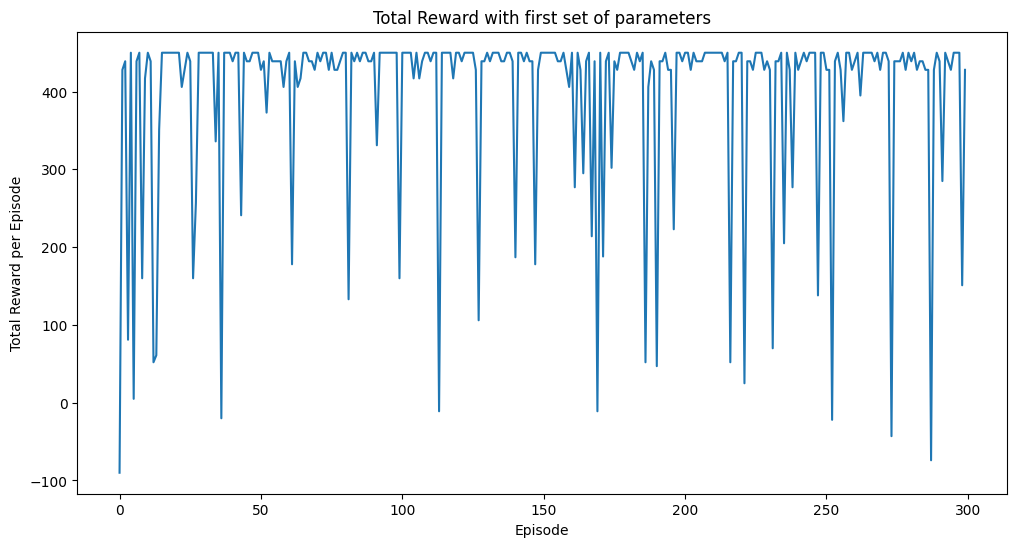

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(best_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode')
plt.title('Total Reward with first set of parameters')
plt.show()

#(third set of parameters) Hyperparameter tuning with Optuna

In [ ]:
def objective(trial):
    gamma = trial.suggest_float('gamma', 0.8, 0.9999)
    epsilon_decay = trial.suggest_float('epsilon_decay', 0.9, 1.0)
    alpha = trial.suggest_float('alpha', 0.01, 0.5)
    epsilon_start = trial.suggest_float('epsilon_start', 0.5, 1.0)
    epsilon_min = trial.suggest_float('epsilon_min', 0.01, 0.1)
    num_episodes = 500
    Q, rewards, epsilons = train_sarsa(env, gamma=gamma, epsilon_decay=epsilon_decay,
                                       num_episodes=num_episodes, alpha=alpha,
                                       epsilon_start=epsilon_start, epsilon_min=epsilon_min)
    average_reward = np.mean(rewards[-100:])
    return average_reward

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2024-11-22 00:50:11,323] A new study created in memory with name: no-name-93b90071-0c5a-4ca8-8a7f-a2dbff07b03d
[I 2024-11-22 00:50:11,612] Trial 0 finished with value: 411.68 and parameters: {'gamma': 0.8952461995317234, 'epsilon_decay': 0.9063109242761306, 'alpha': 0.31874091803349774, 'epsilon_start': 0.9365268271938957, 'epsilon_min': 0.029616453204551432}. Best is trial 0 with value: 411.68.
[I 2024-11-22 00:50:11,997] Trial 1 finished with value: 432.42 and parameters: {'gamma': 0.8284674831427652, 'epsilon_decay': 0.9063902600473187, 'alpha': 0.060193070534644004, 'epsilon_start': 0.6963583689115758, 'epsilon_min': 0.03345946033574289}. Best is trial 1 with value: 432.42.
[I 2024-11-22 00:50:12,308] Trial 2 finished with value: 403.46 and parameters: {'gamma': 0.8064386236387777, 'epsilon_decay': 0.9036906128235094, 'alpha': 0.08496333347502001, 'epsilon_start': 0.6062481073294248, 'epsilon_min': 0.0644344019137597}. Best is trial 1 with value: 432.42.
[I 2024-11-22 00:50:12,5

In [ ]:
print("the best hyperparameters are")
for key, value in study.best_params.items():
    print(f"{key}: {value}")

best_gamma = study.best_params['gamma']
best_epsilon_decay = study.best_params['epsilon_decay']
best_alpha = study.best_params['alpha']
best_epsilon_start = study.best_params['epsilon_start']
best_epsilon_min = study.best_params['epsilon_min']

the best hyperparameters are
gamma: 0.8219648205376665
epsilon_decay: 0.9338736408118097
alpha: 0.12620580877988694
epsilon_start: 0.94107377347036
epsilon_min: 0.010384545838331673


# Train the agent using the best hyperparameters

In [ ]:
num_episodes = 300
best_Q, best_rewards, best_epsilons = train_sarsa(
    env,
    gamma=best_gamma,
    epsilon_decay=best_epsilon_decay,
    num_episodes=num_episodes,
    alpha=best_alpha,
    epsilon_start=best_epsilon_start,
    epsilon_min=best_epsilon_min
)


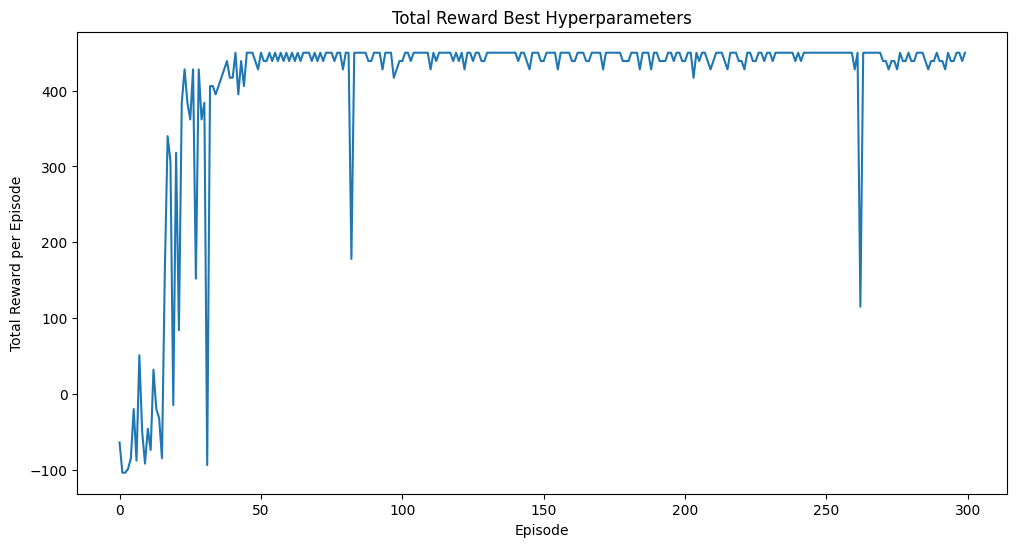

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(best_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode')
plt.title('Total Reward Best Hyperparameters')
plt.show()

#Epsilon decay best params


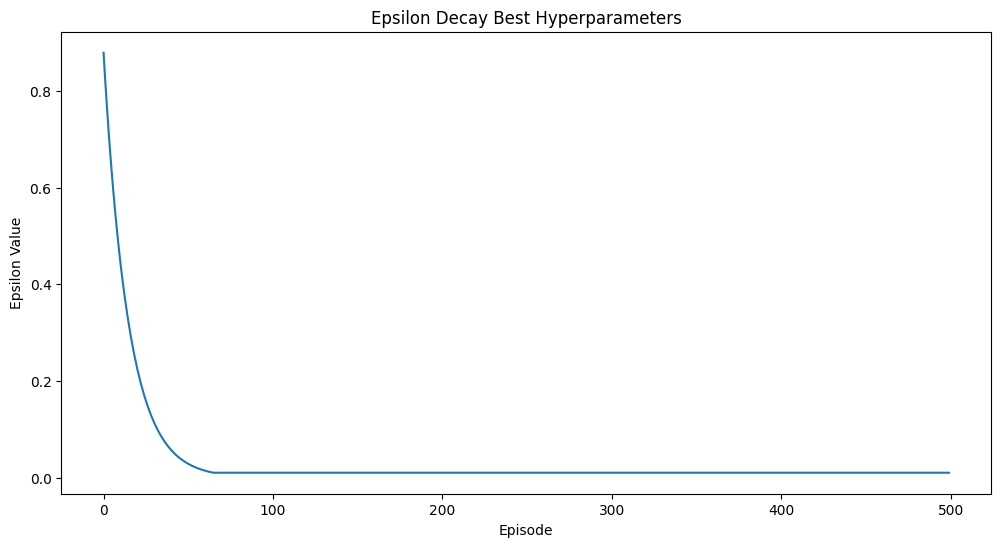

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(best_epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay Best Hyperparameters')
plt.show()

In [ ]:
greedy_rewards_best = []
num_eval_episodes = 10
max_steps = 100

def state_to_index(state):
    return state[0] * env.grid_size + state[1]

for episode in range(num_eval_episodes):
    state = env.reset()
    state_index = state_to_index(state)
    total_reward = 0

    for step in range(max_steps):
        action = np.argmax(best_Q[state_index, :])
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        state_index = state_to_index(next_state)

        if done:
            break

    greedy_rewards_best.append(total_reward)
    print(f"Evaluation Episode: {episode+1}, Total Reward: {total_reward}")


Evaluation Episode: 1, Total Reward: 450
Evaluation Episode: 2, Total Reward: 450
Evaluation Episode: 3, Total Reward: 450
Evaluation Episode: 4, Total Reward: 450
Evaluation Episode: 5, Total Reward: 450
Evaluation Episode: 6, Total Reward: 450
Evaluation Episode: 7, Total Reward: 450
Evaluation Episode: 8, Total Reward: 450
Evaluation Episode: 9, Total Reward: 450
Evaluation Episode: 10, Total Reward: 450


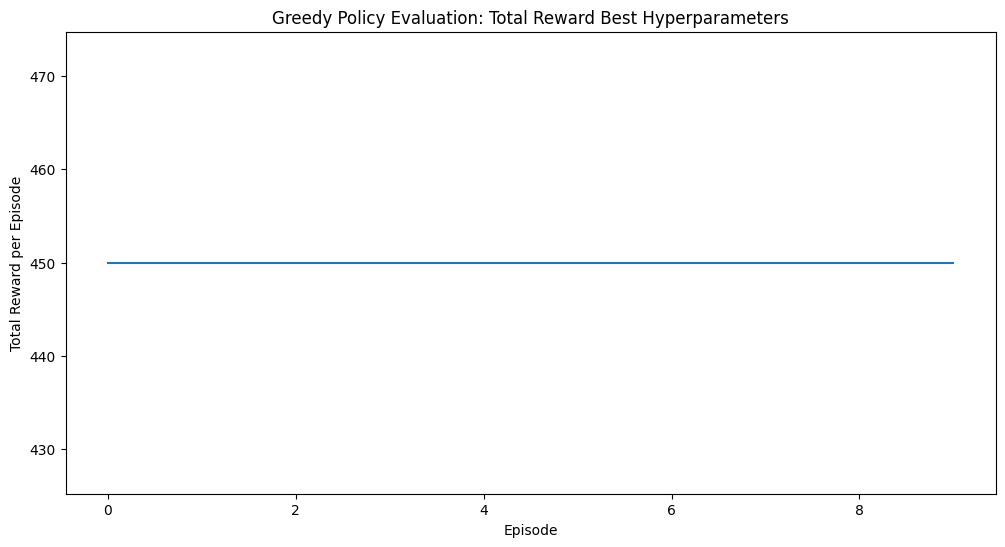

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(greedy_rewards_best)
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode')
plt.title('Greedy Policy Evaluation: Total Reward Best Hyperparameters')
plt.show()


In [ ]:
print("Initial Q-table:")
print(np.zeros((env.grid_size * env.grid_size, env.action_space.n)))


print("\nTrained Q-table with Best Hyperparameters:")
print(best_Q)


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table with Best Hyperparameters:
[[ 1.26249051e+01  5.85584235e+00  4.30223138e+00  2.18388178e+01]
 [ 9.24854915e+00  6.76664892e+00  1.53416945e+01  2.80101549e+01]
 [-1.61696916e-01  1.93423177e+01  8.40646293e-01  3.01505848e+00]
 [-1.26205809e-01  5.53503686e+00 -2.23236830e-01  0.00000000e+00]
 [-2.49575890e-01 -1.26205809e-01 -2.36483711e-01 -1.26205809e-01]
 [-3.57375950e-01 -2.36483711e-01 -1.26205809e-01 -1.39297987e-